In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

In [3]:
data = pd.read_csv('/content/drive/My Drive/Collab file/insurance.csv')

In [4]:
# напишем общую функцию для распаковки данных

def open_data(data):
  display(data.head(5))
  print('-------------------------------')
  print('Общая информация')
  data.info()
  print('-------------------------------')
  print('Описание данных')
  display(data.describe())
  print('-------------------------------')
  print('Количество дубликатов')
  print(data.duplicated().sum())

In [5]:
open_data(data)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


-------------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
-------------------------------
Описание данных


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


-------------------------------
Количество дубликатов
153


In [6]:
# так как названия колонок на русском, 
# я бы заменила их на английский для удобства

data.rename(columns={'Пол': 'gender', 'Возраст': 'age', 'Зарплата': 'income', 'Члены семьи': 'family_members', 'Страховые выплаты': 'payment'}, inplace=True)

In [7]:
# также я хочу поменять тип колонки с возрастом на целочисленный

data['age'] = data['age'].astype('int64')

In [8]:
# в таблице есть 153 дубликата, посмотрим на них

data.loc[data.duplicated(), :]

,gender,age,income,family_members,payment
281,1,39,48100.0,1,0
488,1,24,32900.0,1,0
513,0,31,37400.0,2,0
718,1,22,32600.0,1,0
785,0,20,35800.0,0,0
...,...,...,...,...,...
4793,1,24,37800.0,0,0
4902,1,35,38700.0,1,0
4935,1,19,32700.0,0,0
4945,1,21,45800.0,0,0


In [9]:
# удалим дубликаты

data.drop_duplicates(keep='last', inplace=True)

In [10]:
# посмотрим на распределение значений в столбцах
# проверим столбец с полом

data['gender'].value_counts()

0    2431
1    2416
Name: gender, dtype: int64

**Комментарий:**
<br>Никаких ошибок нет, распределение практически равное.

(15.0, 70.0)

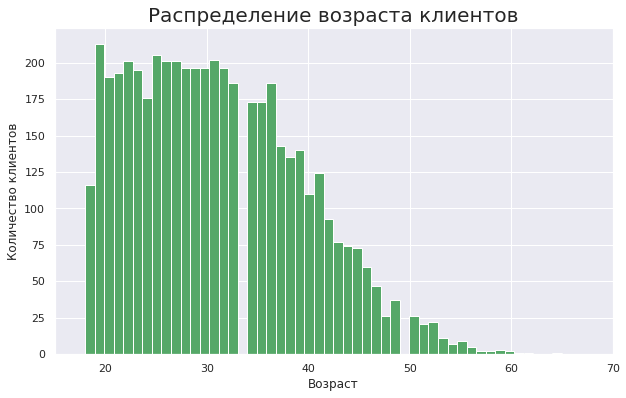

In [11]:
# посмтроим график распределения возраста

plt.figure(figsize=(10, 6))
sns.set()
plt.hist(data['age'], bins=50, facecolor='g')

plt.title(label='Распределение возраста клиентов', fontsize=20)
plt.ylabel('Количество клиентов')
plt.xlabel('Возраст')
plt.xlim(15,70)

**Комментарий:**
<br>Основная масса клиентов - примерно 30 лет. Минимальный возраст - 18 лет. Есть некоторые клиенты 55+. Это не считается выбросами, никаких аномальных значений нет.

Text(0, 0.5, 'Количество клиентов')

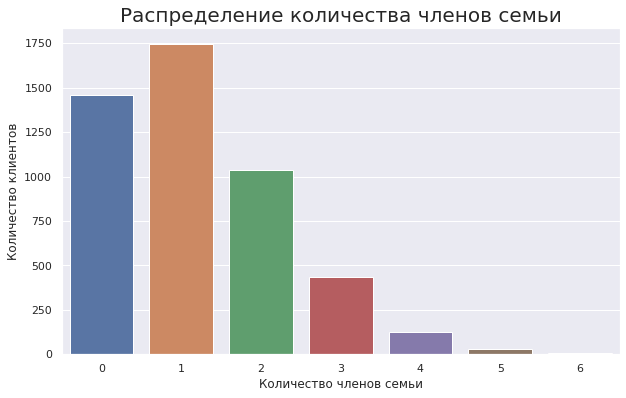

In [12]:
# посмтроим график распределения количества членов семьи

plt.figure(figsize=(10, 6))

sns.countplot(data['family_members']).set_xlabel('Количество членов семьи')

plt.title(label='Распределение количества членов семьи', fontsize=20)
plt.ylabel('Количество клиентов')

**Комментарий:**
<br>Большинство клиентов имеют 1 члена семьи (муж или жена, очевидно), также многие и не имеют семью вовсе.

Text(0.5, 0, 'Размер зарплаты')

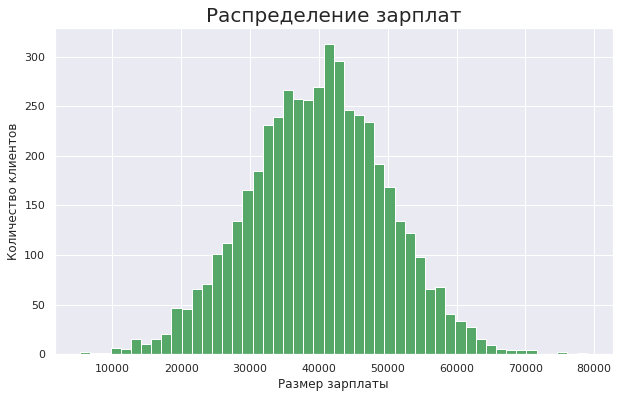

In [13]:
# посмотрим на распределение зарплат

plt.figure(figsize=(10, 6))
sns.set()
plt.hist(data['income'], bins=50, facecolor='g')

plt.title(label='Распределение зарплат', fontsize=20)
plt.ylabel('Количество клиентов')
plt.xlabel('Размер зарплаты')

**Комментарий:**
<br>Интересно, что зарплаты достаточно низкие для клиентов страховой организации. Средняя зарплата - 40 тыс.руб. Минимальная - 5300 (даже ниже МРОТ, потому что по России самая низкая ставка - 15 тыс.руб.). Распределение нормальное, аномальных значений нет.

Text(0, 0.5, 'Количество клиентов')

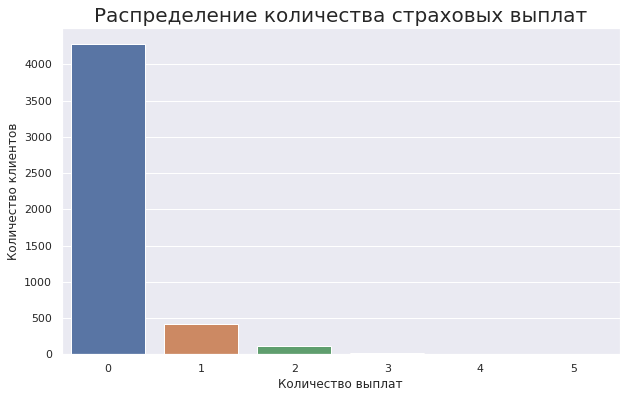

In [14]:
# посмотрим на количество страховых выплат 

plt.figure(figsize=(10, 6))

sns.countplot(data['payment']).set_xlabel('Количество выплат')

plt.title(label='Распределение количества страховых выплат', fontsize=20)
plt.ylabel('Количество клиентов')

In [15]:
data['payment'].value_counts()

0    4284
1     423
2     114
3      18
4       7
5       1
Name: payment, dtype: int64

**Комментарий:**
<br>Большинство клиентов не сталкивалось со страховыми случаями. Есть аномальные, на мой взгляд, значения - 4 и 5 выплат. Однако, я бы не стала эти значения удалять.

Text(0.5, 1.0, 'Тепловая карта корреляции')

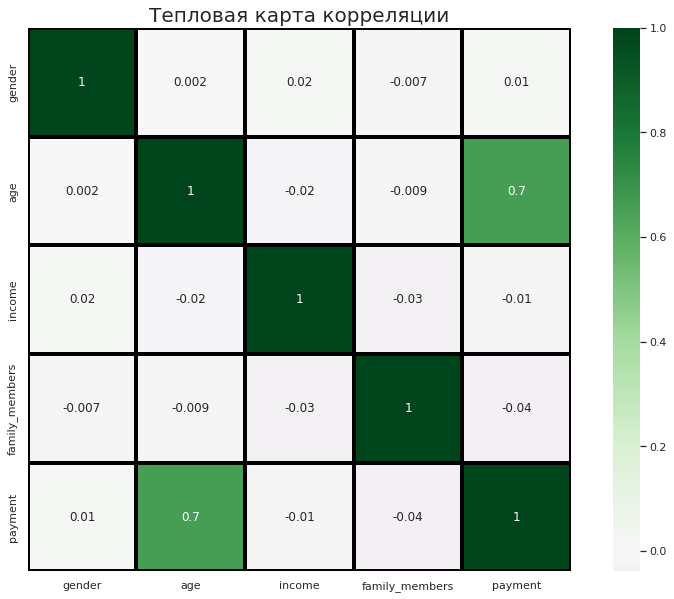

In [16]:
# посмотрим на взаимосвязь данных

plt.figure(figsize=(15,10))

sns.heatmap(data.corr(), annot=True, square=True, center=0, fmt='.1g', cmap='PRGn', linewidths=3, linecolor='black')
plt.title(label='Тепловая карта корреляции', fontsize=20)

**Комментарий:**
<br>Наблюдаем сильную корреляцию между возрастом и страховыми выплатами. В целом выглядит это достаточно логично, так как, вероятнее всего, чем старше человек, тем более расширенный пакет страховки он может себе позволить. Хотя корреляции между возрастом и зарплатой мы не наблюдаем.

In [17]:
#разделим данные на признаки и целевой признак

target = data['payment']
features = data.drop(['payment'], axis=1)

In [18]:
#поделим признаки и целевой признак на обучающую и тренеровочную выборки

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [19]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3635, 4)
(1212, 4)
(3635,)
(1212,)


**Краткий вывод**

- Пропуски в данных отсутствуют.
- Названия колонок были переведены на английский для удобства.
- Колонка с возрастом была приведена к целочисленному типу.
- Были удалены дубликаты в количестве 153 шт.
- Были проанализированы все столбцы, аномальные значения выявлены не были.
- Был проведен краткий анализ взаимосвязи данных. Корреляция наблюдается между возрастом и страховыми выплатами (целевой признак).
- Данные были разделены на целевой признак и остальные признаки.
- Признаки и целевой признак были разбиты на обучающую и тестовую выборки.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** Нет, не изменится.

**Обоснование:**

1. Введем новую переменную **Xi**, она получается из произведения матрицы признаков на произвольную матрицу.

$$
Xi = X * P
$$

2. Сделаем обучение заново (**wi**), подставим **Xi** в формулу обучения.

$$
wi = ((XP)^T XP)^{-1} (XP)^T y
$$

3. Раскроем скобки у **$(XP)^T$**.

$$
wi = (X^TP^T XP)^{-1} X^TP^T y
$$

4. Разобьем скобку **$(X^TP^T XP)^{-1}$**.

$$
wi = P^{-1}(X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

5. По условию матрица P обратимая, поэтому произведение **$(P^T)^{-1} P^T$** равно единичной матрице E.

$$
wi = P^{-1}(X^T X)^{-1} EX^T y
$$

6. Умножение любой матрицы на единичную равно этой же матрице.

$$
wi = P^{-1}(X^T X)^{-1} X^T y
$$

7. После преобразования получилась формула обучения.

$$
wi = P^{-1} w
$$

8. Подставим в формулу предсказания значения **Xi** и **wi** , чтобы вычислить предсказания модели **ai**.

$$
ai = Xiwi
$$

9. Продолжим наши преобразования разложив **Xi** и **wi**

$$
ai = XPP^{-1}(X^T X)^{-1} X^T y
$$

10. Произведение **$PP^{-1}$** равно единичной матрице.

$$
ai = XE(X^T X)^{-1} X^T y = X(X^T X)^{-1} X^T y
$$

11. Сократим запись.

$$
ai = Xw
$$

Таким образом преобразовав формулу мы получили результат, в котором предсказания ai равны предсказаниям a.

## Алгоритм преобразования

**Алгоритм**

Для алгоритма перемножим матрицу X на случайную обратимую матрицу P, которую создадим с помощью np.random.normal

**Обоснование**

In [20]:
# создадим случайную матрицу P размерностью 4х4

matrix_p =  np.random.normal(size=(features.shape[1],features.shape[1]))
matrix_p

array([[-0.46978859, -0.56653444, -0.67863788, -0.52120621],
       [-0.57999346, -0.50038919,  0.1663999 ,  0.4754121 ],
       [-0.66577798,  1.05961262, -0.75691717, -0.42919582],
       [ 1.43663231, -1.01609072, -0.03095547,  0.10755527]])

In [21]:
# проверим матрицу на обратимость, на главной диагонали должны быть единицы, 
# когда перемножаем матрицу с ее обратной матрицей

matrix_p = np.linalg.inv(matrix_p)
np.round(matrix_p @ np.linalg.inv(matrix_p))

array([[ 1.,  0.,  0., -0.],
       [-0.,  1., -0., -0.],
       [-0., -0.,  1.,  0.],
       [-0., -0., -0.,  1.]])

In [22]:
# преобразуем features в матрицы

features_train_m = features_train.values
features_test_m = features_test.values 

In [23]:
# перемножим матрицы с признаками на случайную матрицу

features_random_and_train = features_train_m.dot(matrix_p)
features_random_and_test = features_test_m.dot(matrix_p)

In [24]:
# перемножим обучающую выборку с обратной случайной матрицей

final_features = features_random_and_train.dot(np.linalg.inv(matrix_p))

In [25]:
# соберем таблицу

features_train_table = pd.DataFrame(final_features, columns=features_train.columns)
features_train_table = np.round(features_train_table)

In [26]:
display(features_train_table)
print()
display(features_train)

,gender,age,income,family_members
0,-0.0,22.0,48400.0,2.0
1,-0.0,40.0,38000.0,-0.0
2,-0.0,24.0,33700.0,3.0
3,-0.0,28.0,30500.0,1.0
4,1.0,31.0,38700.0,1.0
...,...,...,...,...
3630,1.0,35.0,51500.0,3.0
3631,-0.0,21.0,41000.0,1.0
3632,1.0,27.0,57300.0,1.0
3633,1.0,33.0,41100.0,1.0


,gender,age,income,family_members
4613,0,22,48400.0,2
3920,0,40,38000.0,0
4714,0,24,33700.0,3
1472,0,28,30500.0,1
777,1,31,38700.0,1
...,...,...,...,...
3642,1,35,51500.0,3
3637,0,21,41000.0,1
2292,1,27,57300.0,1
3703,1,33,41100.0,1


**Краткий вывод:** 
<br>Данные не изменились, следовательно качество линейной регрессии не поменяется. 

## Проверка алгоритма

In [27]:
#обучим модель линейной регрессии

model = LinearRegression()
model.fit(features_train, target_train)

r2 = model.score(features_test, target_test)
print('R2 для модели с изначальными данными: {:.2f}'.format(r2))

R2 для модели с изначальными данными: 0.45


In [28]:
#обучим модель линейной регрессии, но используем матричное преобразование

model_matrix = LinearRegression()
model_matrix.fit(features_random_and_train, target_train)

r2_m = model_matrix.score(features_random_and_test, target_test)
print('R2 для модели с матричным преобразованием: {:.2f}'.format(r2_m))

R2 для модели с матричным преобразованием: 0.45


**Краткий вывод:** 
<br>Показатели метрики R2 равны, что означает, что алгоритм рабочий.

## Вывод по работе

- Данные прошли первичную предобработку.
- Во 2 разделе мы произвели преобразование формулы, тем самым доказав, что качество линейной регрессии не меняется, если признаки будут умножены на обратимую матрицу.
- Был проверен алгоритм линейной регрессии, который оказался рабочим, так как метрики R2 для двух моделей равны.
- Результат говорит нам о том, что нам удалось успешно защитить данные пользователей, не потеряв при этом качество алгоритма.